# Week6-sklearn

## 사이킷런 소개
p. 3~5
- 파이썬 기반의 머신러닝을 위한 쉽고 효율적인 라이브러리 제공
- 최근에는 텐서플로, 파이토치 등 딥러닝 라이브러리가 강세이지만, 여전히 많은 데이터과학자가 사이킷런 라이브러리를 활용
- 설치 방법(Anaconda prompt에서): conda install scikit-learn

In [2]:
# 설치 확인
import sklearn

print(sklearn.__version__)

0.24.2


## 첫 번째 머신러닝 만들어 보기: 붓꽃 품종 예측하기
p. 6~7
- **목표**: 붓꽃의 품종을 분류(classification)
- **데이터**: 붓꽃(iris) 품종 데이터 세트
- **모델**: 의사 결정 트리(Decision Tree)

In [1]:
# 사이킷런 기능 별 모듈로 구성
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
# 사이킷런 내장 붓꽃 데이터 로드
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 feature만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값: ', iris_label)
print('iris target명: ', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명:  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
# 학습 및 테스트 데이터 나누기: 테스트 데이터는 평가만
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [5]:
# 학습 데이터로 의사 결정 트리 학습

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
# 테스트 데이터에 학습한 모델로 예측

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)

In [7]:
# 테스트 데이터에 예측한 값으로 성능 평가
from sklearn.metrics import accuracy_score

print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


## 사이킷런 기반 프레임워크 익히기
p. 8~10
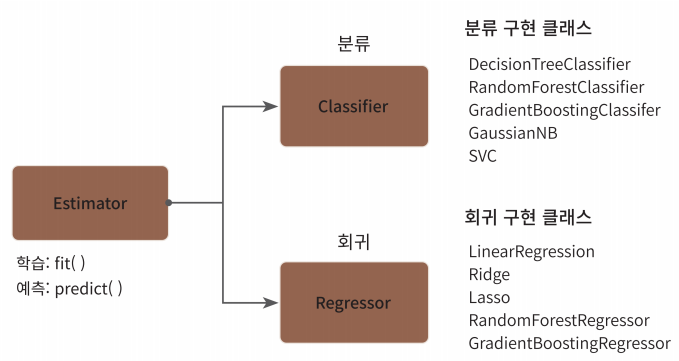

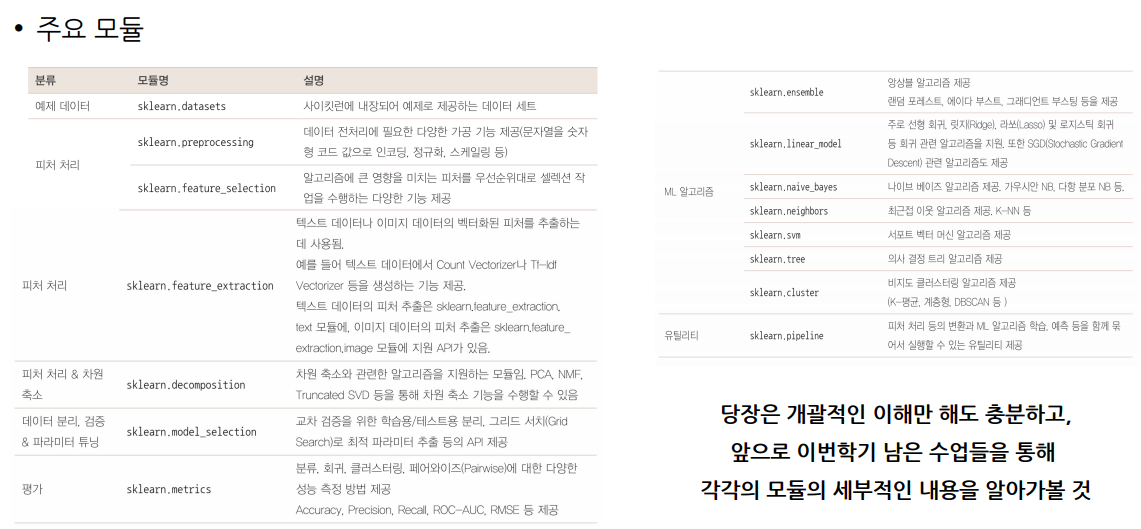

In [8]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [9]:
keys = iris_data.keys()
print("붓꽃 데이터 세트의 키들: ", keys)

붓꽃 데이터 세트의 키들:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print("\n feature_names의 type:", type(iris_data.feature_names))
print("feature_names의 shape", len(iris_data.feature_names))
print(iris_data.feature_names)

print("="*50)

print("\n target_names의 type:", type(iris_data.target_names))
print("target_names의 shape", len(iris_data.target_names))
print(iris_data.target_names)

print("="*50)

print("\n data의 type:", type(iris_data.data))
print("data의 shape", len(iris_data.data))
print(iris_data.data)

print("="*50)

print("\n target의 type:", type(iris_data.target))
print("target의 shape", len(iris_data.target))
print(iris_data.target)


 feature_names의 type: <class 'list'>
feature_names의 shape 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape 150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 

## Model Selection 모듈 소개
p. 11~20
- 데이터 분리, 검증, 파라미터 튜닝
- train_test_split(): X_train, X_test, y_train, y_test를 튜플로 리턴
- test_size: 전체 데이터 중 테스트데이터를 얼마나 샘플링 할지
- shuffle: 분리 전 데이터 섞을지 여부
- random_state: 동일한 학습/테스트 생성을 위해 지정하는 값

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

In [12]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


#### 교차검증(cross-validation): 본 시험을 보기 전 모의고사를 여러 번 보는 것
- K-fold: 테스트셋 분포와 실제 데이터 셋 분포가 달라질 수 있음
- StratifiedKfold: K-fold보완
- cross_val_score: 교차검증을 쉽게 구현 가능
- GridSearchCV: 교차 검증과 하이퍼파라미터 튜닝을 같이 수행하는 클래스
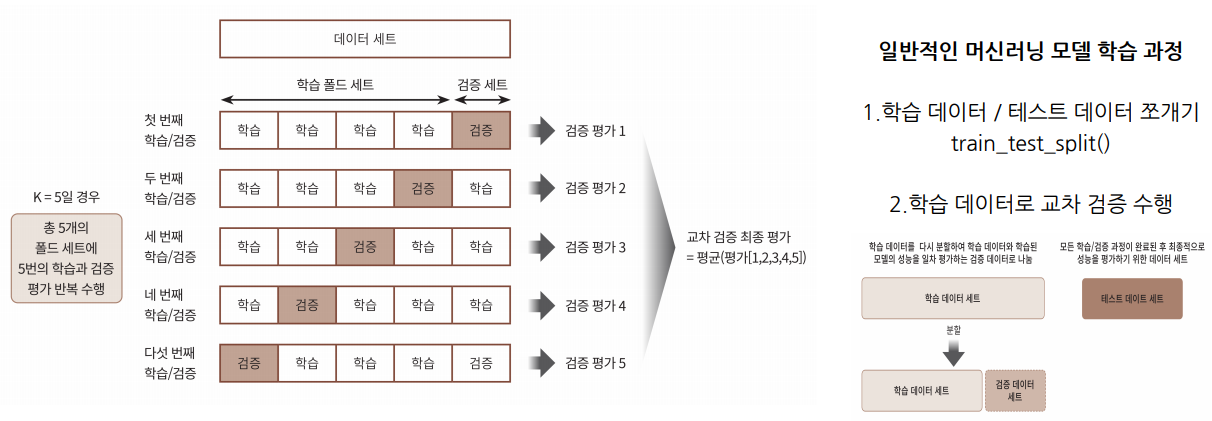

In [13]:
# 방법1: Kfold(n_splits)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold
kfold = KFold(n_splits=5)
cv_accuracy = []
print("붓꽃 데이터 세트 크기:", features.shape[0])

# print()할때 사용할 변수
n_iter = 0

# kfold.split(): 폴드 별 학습용, 검증용 데이터의 index 반환
for train_index, test_index in kfold.split(features):
    # 폴드별로 나온 index로 train, test나눔
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1    # 학습을 할 때마다 증가
    
    # 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print("\n#{0} 교차 검증 정확도:{1}, 학습데이터 크기: {2}, 검증데이터 크기:{3}".format(n_iter, accuracy, train_size, test_size))
    print("#{0} 검증 세트 인덱스:{1}".format(n_iter, test_index))
    
    cv_accuracy.append(accuracy)
    
print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))

붓꽃 데이터 세트 크기: 150

#1 교차 검증 정확도:1.0, 학습데이터 크기: 120, 검증데이터 크기:30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도:0.9667, 학습데이터 크기: 120, 검증데이터 크기:30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도:0.8667, 학습데이터 크기: 120, 검증데이터 크기:30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도:0.9333, 학습데이터 크기: 120, 검증데이터 크기:30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도:0.7333, 학습데이터 크기: 120, 검증데이터 크기:30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [15]:
# 방법1의 문제점: 분포가 달라짐
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target

# 0,1,2가 50씩 동일하게 있음
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [20]:
# 하지만 kfold로 나누면 학습데이터에 0이 없는 경우, 1이 없는 경우, 2가 없는 경우가 생김
kfold = KFold(n_splits=3)

n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print("\n## 교차검증: {0}".format(n_iter))
    print("학습 레이블 데이터 분포:\n", label_train.value_counts())
    print("검증 레이블 데이터 분포:\n", label_test.value_counts())


## 교차검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64

## 교차검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64

## 교차검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [21]:
# 방법2: StratifiedKfold(n_splits)
# 학습, 검증에 각각 1:1:1 비율로 나뉨
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    
    print("\n## 교차검증: {0}".format(n_iter))
    print("학습 레이블 데이터 분포:\n", label_train.value_counts())
    print("검증 레이블 데이터 분포:\n", label_test.value_counts())


## 교차검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64

## 교차검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64

## 교차검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [22]:
# 방법2: StratifiedKfold(n_splits)로 성능 검증
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skfold.split(features, label):
    # 폴드별로 나온 index로 train, test나눔
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1    # 학습을 할 때마다 증가
    
    # 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print("\n#{0} 교차 검증 정확도:{1}, 학습데이터 크기: {2}, 검증데이터 크기:{3}".format(n_iter, accuracy, train_size, test_size))
    print("#{0} 검증 세트 인덱스:{1}".format(n_iter, test_index))
    
    cv_accuracy.append(accuracy)

print("\n## 교차 검증별 정확도:", np.round(cv_accuracy, 4))
print("## 평균 검증 정확도:", np.mean(cv_accuracy))


#1 교차 검증 정확도:0.98, 학습데이터 크기: 100, 검증데이터 크기:50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도:0.94, 학습데이터 크기: 100, 검증데이터 크기:50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도:0.98, 학습데이터 크기: 100, 검증데이터 크기:50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


In [24]:
# 방법3: cross_val_score(estimator, X, y=None, scoring=None, cv=None, ...)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print("교차 검증별 정확도:", np.round(scores, 4))
print("평균 검증 정확도:", np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


In [26]:
# 방법4: GridSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

# refit=True가 default(가장 좋은 파라미터 설정으로 재학습 시킴)
grid_tree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_tree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [28]:
print("GridSearchCV 최적 파라미터:", grid_tree.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f}".format(grid_tree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [29]:
# 이미 학습된(최적 하이퍼 파라미터로 학습된) estimator 변환
estimator = grid_tree.best_estimator_

pred = estimator.predict(X_test)
print("테스트 데이터 세트 정확도:{0:.4f}".format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도:0.9667


## 데이터 전처리
p. 21~30
- Garbage In, Garbage Out: 나쁜 데이터를 넣으면 나쁜 결과가 나온다
- 데이터 인코딩: ML 알고리즘이 처리할 수 없는 인풋(문자)을 처리할 수 있는 형태(숫자)로 바꿔주는 것
- 피쳐 스케일링과 정규화: 서로 다른 크기를 가진 피쳐를 비슷한 수치값을 지니도록 만들어줌
- 스케일링 변환 시 유의점: 학습데이터에는 fit, transform을 테스트데이터에는 transform만

#### 레이블 인코딩: LabelEncoder 클래스
- 레이블 인코딩의 문제: 숫자로 카테고리를 표현하기 때문에, ML알고리즘이 분류 코드로 사용된 숫자의 크기를 이용하려 할 수 있음

In [30]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# fit()과 transform()으로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print("인코딩 변환값:", labels)
print("인코딩 클래스:", encoder.classes_)
print("디코딩 원본 값:", encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 변환값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


#### 원-핫 인코딩: OneHotEncoder 또는 pandas.get_dummies()

In [32]:
# 방법1: OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

items=['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자값으로 변환하기 위해 LabelEncoder로 변환한다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환한다.
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용한다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print("원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [34]:
# 방법2: pandas.get_dummies()
df = pd.DataFrame({'item':['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피쳐 스케일링과 정규화
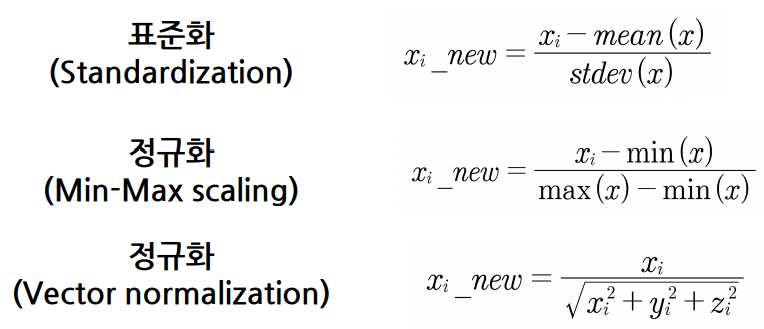

In [38]:
# 표준화(Standardization)
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print("features의 평균값\n", iris_df.mean())
print("features의 분산값\n", iris_df.var())

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 ndarray로 return되기 때문에 DataFrame으로 바꿔주는 작업이 필요
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("\nscaled features의 평균값\n", iris_df_scaled.mean())
print("scaled features의 분산값\n", iris_df_scaled.var())

features의 평균값
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
features의 분산값
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

scaled features의 평균값
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
scaled features의 분산값
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [39]:
# 정규화(Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("scaled features의 평균값\n", iris_df_scaled.mean())
print("scaled features의 분산값\n", iris_df_scaled.var())


scaled features의 평균값
 sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
scaled features의 분산값
 sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64
